In [ ]:
#import libraries
from Bio import SeqIO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
final_df = pd.read_csv('/Users/anshamohammed/Downloads/final_dataset_30_june_18234_data_points_27_genus.csv')

Machine learning algorithms

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
encoded_virus_class = LE.fit_transform(final_df['genus_name'])
#virus = LE.inverse_transform(encoded_virus_class)
final_df['genus_name_label'] = encoded_virus_class
   

In [ ]:
final_df

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,...,yyp,yyq,yyr,yys,yyt,yyv,yyw,yyy,genus_name,genus_name_label
0,7.87,0.79,5.77,2.10,6.82,9.97,1.57,7.09,2.62,8.40,...,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,ACINETOBACTER,0
1,8.92,0.55,5.88,2.63,4.08,10.86,1.04,6.09,4.84,7.26,...,0.07,0.07,0.14,0.0,0.00,0.0,0.0,0.0,ACINETOBACTER,0
2,9.18,0.20,5.66,5.08,2.93,13.67,2.34,5.08,4.88,8.40,...,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,ACINETOBACTER,0
3,9.18,0.20,5.66,4.88,2.93,13.67,1.95,4.49,5.08,8.79,...,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,ACINETOBACTER,0
4,5.61,0.00,6.12,5.10,5.10,8.67,1.53,5.61,7.14,5.10,...,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,ACINETOBACTER,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18161,11.99,0.54,5.99,4.09,1.63,9.26,1.91,5.18,5.18,9.26,...,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,ESCHERICHIA,14
18162,12.71,1.00,5.14,3.00,2.86,9.43,1.43,4.71,4.43,6.00,...,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,ESCHERICHIA,14
18163,11.97,0.70,4.65,4.08,2.11,10.00,3.52,5.49,4.79,5.35,...,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,ESCHERICHIA,14
18164,11.45,0.15,6.17,3.82,2.94,8.96,0.88,5.29,5.14,7.64,...,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,ESCHERICHIA,14


In [ ]:
dict_vir = {}
for i in range(len(final_df)):
    dict_vir[final_df['genus_name_label'][i]] = final_df['genus_name'][i]

In [ ]:
dict_vir

{0: 'ACINETOBACTER',
 1: 'AEROMONAS',
 2: 'ALPHAPROTEOBACTERIA',
 3: 'BACILLUS',
 4: 'BARTONELLA',
 5: 'BORDETELLA',
 6: 'BORRELIA',
 7: 'BRUCELLA',
 8: 'BURKHOLDERIA',
 9: 'CAMPYLOBACTER',
 10: 'CITROBACTER',
 11: 'CLOSTRIDIUM',
 12: 'EDWARDSIELLA',
 13: 'ENTEROBACTER',
 14: 'ESCHERICHIA',
 15: 'HAEMOPHILUS',
 16: 'KLEBSIELLA',
 17: 'LEPTOSPIRA',
 18: 'NEISSERIA',
 20: 'PSEUDOMONAS',
 21: 'SALMONELLA',
 22: 'SHIGELLA',
 23: 'STAPHYLOCOCCUS',
 24: 'STREPTOCOCCUS',
 25: 'VIBRIO',
 26: 'YERSINIA',
 19: 'OTHER'}

In [ ]:
def train_test(vectored_df):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(vectored_df.drop(['genus_name','genus_name_label'], axis = 1), vectored_df['genus_name_label'], test_size = 0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train,  y_train, test_size = 0.2, random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [ ]:
X_train, X_val, X_test, y_train, y_val, y_test = train_test(final_df)

In [ ]:
len(X_train)

11625

In [ ]:
from imblearn.over_sampling import RandomOverSampler
randomsampler = RandomOverSampler(sampling_strategy= 'not majority', random_state = 0)
X_train,y_train = randomsampler.fit_resample(X_train,y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint


In [ ]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold = 0)
X_train_var = selector.fit_transform(X_train)
X_val_var = selector.transform(X_val)
X_test_var = selector.transform(X_test)
len(selector.get_feature_names_out())

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train_var, X_val_var, y_train, y_val)
models

100%|██████████| 29/29 [5:06:24<00:00, 633.95s/it]   


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.88,0.72,None,0.88,32.17
PassiveAggressiveClassifier,0.87,0.70,None,0.87,91.12
Perceptron,0.86,0.67,None,0.86,64.93
NearestCentroid,0.72,0.67,None,0.76,2.66
LinearDiscriminantAnalysis,0.75,0.66,None,0.77,371.77
RidgeClassifierCV,0.79,0.63,None,0.79,263.83
LGBMClassifier,0.87,0.62,None,0.87,137.82
XGBClassifier,0.87,0.61,None,0.87,1825.61
RidgeClassifier,0.75,0.60,None,0.75,14.55


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df.drop(['genus_name','genus_name_label'], axis = 1), final_df['genus_name_label'], test_size = 0.2, random_state=42)

In [ ]:
import random
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from scipy.stats import uniform, randint

In [ ]:
# Define the hyperparameter search space
param_space = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.linspace(0.1, 10, 100),
    'fit_intercept': [True, False],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': random.choices(range(100, 301), k=100),
    'multi_class': ['ovr', 'multinomial'],
    'class_weight': [None, 'balanced']
}

In [ ]:
# Create the logistic regression model
logistic_regression = LogisticRegression()

# Perform random search
random_search = RandomizedSearchCV(estimator=logistic_regression, param_distributions=param_space,
                                   n_iter=10, scoring='accuracy', cv=5, random_state=42)
random_search.fit(X_train, y_train)

In [ ]:
# Print the best hyperparameters and the corresponding accuracy
print("Best Hyperparameters: ", random_search.best_params_)
print("Best Accuracy: ", random_search.best_score_)


Best Hyperparameters:  {'solver': 'sag', 'penalty': 'none', 'multi_class': 'ovr', 'max_iter': 213, 'fit_intercept': True, 'class_weight': None, 'C': 1.7000000000000002}
Best Accuracy:  0.8892787682199573


In [ ]:
# setting up the best logistic regression model
model_5 = LogisticRegression(solver = 'sag', penalty = 'none', multi_class =  'ovr', max_iter = 213, fit_intercept = True, class_weight = None, C = 1.7000000000000002)
model_5.fit(X_train,y_train)

/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter 

LogisticRegression(C=1.7000000000000002, max_iter=213, multi_class='ovr',
                   penalty='none', solver='sag')

In [ ]:
y_pred = model_5.predict(X_test)
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.74      0.81        43
           1       0.79      0.75      0.77        20
           2       0.50      0.06      0.10        18
           3       1.00      0.41      0.58        17
           4       1.00      1.00      1.00        25
           5       0.00      0.00      0.00         3
           6       0.91      1.00      0.95        10
           7       1.00      0.75      0.86         4
           8       0.90      0.90      0.90        21
           9       1.00      0.96      0.98        57
          10       0.54      0.25      0.34        28
          11       0.97      0.76      0.85        46
          12       1.00      0.50      0.67         4
          13       0.72      0.57      0.64        37
          14       0.87      0.90      0.88       780
          15       0.93      0.87      0.90        15
          16       0.87      0.90      0.88        68
   

In [ ]:
# Get the probability estimates for each class
proba_values = model_5.predict_proba(X_test)

# Set the number of top predictions to retrieve
k = 3

# Get the indices of the top-k predictions
top_k_indices = np.argsort(proba_values, axis=1)[:, -k:]

reversed_array = np.array([arr[::-1] for arr in top_k_indices])

# Get the class labels corresponding to the top-k indices
top_k_predictions = model_5.classes_[reversed_array]

# Get the probability values for the top-k predictions
top_k_proba_values = np.take_along_axis(proba_values, reversed_array, axis=1)

# Access the top three predictions and their corresponding probability values for each input sample

print("              Sl No:    |       Prediction                          |          Probability " )
print('              __________|___________________________________________|_____________________')
for i in range(len(X_test)):
    print(f"Sample {i+1}:               |                                           |")
    for j in range(k):
        print('                 '             ,j+1,'    |      ' ,"{:<{width}}".format(dict_vir[top_k_predictions[i][j]], width=30),'     |          ' , "{:.2f}".format(top_k_proba_values[i][j]))

              Sl No:    |       Prediction                          |          Probability 
              __________|___________________________________________|_____________________
Sample 1:               |                                           |
                  1     |       OTHER                               |           1.00
                  2     |       ALPHAPROTEOBACTERIA                 |           0.00
                  3     |       BACILLUS                            |           0.00
Sample 2:               |                                           |
                  1     |       ESCHERICHIA                         |           0.51
                  2     |       PSEUDOMONAS                         |           0.44
                  3     |       AEROMONAS                           |           0.04
Sample 3:               |                                           |
                  1     |       OTHER                               |           0.99
            

In [ ]:
from joblib import dump, load
dump(model_5, '/Users/anshamohammed/Downloads/logistic_regression_model.joblib')

['/Users/anshamohammed/Downloads/logistic_regression_model.joblib']

In [ ]:
# Create the Passive Aggressive Classifier
classifier = PassiveAggressiveClassifier()

# Define the hyperparameter search space
param_dist = {
    'C': uniform(loc=0.1, scale=10),
    'fit_intercept': [True, False],
    'max_iter': randint(100, 1000),
    'tol': uniform(loc=0, scale=0.01),
    'loss': ['hinge', 'squared_hinge'],
    'average': [True, False],
    'random_state': [42]
}


In [ ]:
# Perform random search
random_search = RandomizedSearchCV(
    estimator=classifier,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=5,  # Cross-validation folds
    random_state=42
)

random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=PassiveAggressiveClassifier(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x2962357b0>,
                                        'average': [True, False],
                                        'fit_intercept': [True, False],
                                        'loss': ['hinge', 'squared_hinge'],
                                        'max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x2a3043640>,
                                        'random_state': [42],
                                        'tol': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x296237850>},
                   random_state=42)

In [ ]:
# Get the best hyperparameters and corresponding model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Hyperparameters: ", best_params)
print("Best Model: ", best_model)


Best Hyperparameters:  {'C': 0.5645041271999772, 'average': True, 'fit_intercept': True, 'loss': 'hinge', 'max_iter': 940, 'random_state': 42, 'tol': 0.0006505159298527952}
Best Model:  PassiveAggressiveClassifier(C=0.5645041271999772, average=True, max_iter=940,
                            random_state=42, tol=0.0006505159298527952)


In [ ]:
#setting up the best passive aggressive classifier model
passive_aggressive = PassiveAggressiveClassifier(C = 0.5645041271999772, average = True, fit_intercept = True, loss = 'hinge', max_iter = 940, random_state = 42, tol =0.0006505159298527952)
passive_aggressive.fit(X_train,y_train)

PassiveAggressiveClassifier(C=0.5645041271999772, average=True, max_iter=940,
                            random_state=42, tol=0.0006505159298527952)

In [ ]:
from sklearn.metrics import classification_report
pred = passive_aggressive.predict(X_test)
print("Classification Report: ")
print(classification_report(y_test, pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.72      0.78        43
           1       0.88      0.70      0.78        20
           2       1.00      0.06      0.11        18
           3       1.00      0.41      0.58        17
           4       1.00      0.96      0.98        25
           5       0.00      0.00      0.00         3
           6       0.91      1.00      0.95        10
           7       1.00      0.50      0.67         4
           8       0.95      0.90      0.93        21
           9       0.98      0.98      0.98        57
          10       0.50      0.25      0.33        28
          11       0.95      0.76      0.84        46
          12       0.00      0.00      0.00         4
          13       0.66      0.51      0.58        37
          14       0.87      0.90      0.89       780
          15       0.93      0.87      0.90        15
          16       0.88      0.90      0.89        68
   

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Get the decision scores for each class
decision_scores = passive_aggressive.decision_function(X_test)

# Set the number of top predictions to retrieve
k = 3

# Get the indices of the top-k predictions
top_k_indices = np.argsort(decision_scores, axis=1)[:, -k:]

# Get the class labels corresponding to the top-k indices
top_k_predictions = passive_aggressive.classes_[top_k_indices]

# Access the second and third-best predictions for each input sample
best_prediction = top_k_predictions[:, -1]
second_best_predictions = top_k_predictions[:, -2]
third_best_predictions = top_k_predictions[:, -3]

print(best_prediction, second_best_predictions, third_best_predictions)

In [ ]:
# Create the Perceptron model
perceptron = Perceptron()

# Define the hyperparameter search space
param_dist_1 = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'alpha': uniform(loc=0, scale=1),
    'fit_intercept': [True, False],
    'max_iter': randint(100, 1000),
    'tol': uniform(loc=0, scale=0.01),
    'eta0': uniform(loc=0, scale=1),
    'shuffle': [True, False],
    'random_state': [42]
}


RandomizedSearchCV

In [ ]:
# Perform random search
random_search_1 = RandomizedSearchCV(
    estimator=perceptron,
    param_distributions=param_dist_1,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=5,  # Cross-validation folds
    random_state=42
)

random_search_1.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=Perceptron(),
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x28c3bd8a0>,
                                        'eta0': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x28c3bea40>,
                                        'fit_intercept': [True, False],
                                        'max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x28c3bdff0>,
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'random_state': [42],
                                        'shuffle': [True, False],
                                        'tol': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x15906fbb0>},
                   random_state=42)

In [ ]:
# Get the best hyperparameters and corresponding model
best_params_2 = random_search_1.best_params_
best_model_2 = random_search_1.best_estimator_

print("Best Hyperparameters: ", best_params_2)
print("Best Model: ", best_model_2)


Best Hyperparameters:  {'alpha': 0.7851759613930136, 'eta0': 0.19967378215835974, 'fit_intercept': True, 'max_iter': 343, 'penalty': None, 'random_state': 42, 'shuffle': True, 'tol': 0.00046450412719997725}
Best Model:  Perceptron(alpha=0.7851759613930136, eta0=0.19967378215835974, max_iter=343,
           random_state=42, tol=0.00046450412719997725)


In [ ]:
perceptron = Perceptron(alpha=0.7851759613930136, eta0=0.19967378215835974, max_iter=343, random_state=42, tol=0.00046450412719997725, fit_intercept = True, shuffle = True, penalty = None)
perceptron.fit(X_train, y_train)

Perceptron(alpha=0.7851759613930136, eta0=0.19967378215835974, max_iter=343,
           random_state=42, tol=0.00046450412719997725)

In [ ]:
from sklearn.metrics import classification_report
pred_pers = perceptron.predict(X_test)
print("Classification Report: ")
print(classification_report(y_test, pred_pers))

Classification Report: 
              precision    recall  f1-score   support

           0       0.66      0.81      0.73        43
           1       0.52      0.80      0.63        20
           2       1.00      0.11      0.20        18
           3       1.00      0.41      0.58        17
           4       0.77      0.96      0.86        25
           5       0.00      0.00      0.00         3
           6       0.91      1.00      0.95        10
           7       1.00      0.50      0.67         4
           8       0.95      0.95      0.95        21
           9       0.97      0.98      0.97        57
          10       0.35      0.29      0.31        28
          11       1.00      0.70      0.82        46
          12       0.25      0.25      0.25         4
          13       0.28      0.78      0.41        37
          14       0.92      0.78      0.84       780
          15       0.59      0.87      0.70        15
          16       0.67      0.90      0.77        68
   

In [ ]:
from sklearn.ensemble import VotingClassifier
# Initialize individual models with the best hyperparameters
logistic_regression = LogisticRegression(solver = 'sag', penalty = 'none', multi_class =  'ovr', max_iter = 213, fit_intercept = True, class_weight = None, C = 1.7000000000000002)
perceptron = Perceptron(alpha=0.7851759613930136, eta0=0.19967378215835974, max_iter=343, random_state=42, tol=0.00046450412719997725, fit_intercept = True, shuffle = True, penalty = None)
passive_aggressive = PassiveAggressiveClassifier(C = 0.5645041271999772, average = True, fit_intercept = True, loss = 'hinge', max_iter = 940, random_state = 42, tol =0.0006505159298527952)

# Create the ensemble model
ensemble_model = VotingClassifier(
    estimators=[
        ('logistic_regression', logistic_regression),
        ('perceptron', perceptron),
        ('passive_aggressive', passive_aggressive)
    ],
    voting='hard'  # Use 'hard' for majority voting or 'soft' for weighted voting
)

# Train the ensemble model on your training data
ensemble_model.fit(X_train, y_train)

/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter 

VotingClassifier(estimators=[('logistic_regression',
                              LogisticRegression(C=1.7000000000000002,
                                                 max_iter=213,
                                                 multi_class='ovr',
                                                 penalty='none',
                                                 solver='sag')),
                             ('perceptron',
                              Perceptron(alpha=0.7851759613930136,
                                         eta0=0.19967378215835974, max_iter=343,
                                         random_state=42,
                                         tol=0.00046450412719997725)),
                             ('passive_aggressive',
                              PassiveAggressiveClassifier(C=0.5645041271999772,
                                                          average=True,
                                                          max_iter=940,
                                                          random_state=42,
                                                          tol=0.0006505159298527952))])

In [ ]:
# Evaluate the ensemble model on your test data
accuracy = ensemble_model.score(X_test, y_test)
accuracy

0.8959823885525592

In [ ]:
from sklearn.metrics import classification_report
pred_10 = ensemble_model.predict(X_test)
print("Classification Report: ")
print(classification_report(y_test, pred_10))

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.74      0.77        43
           1       0.68      0.75      0.71        20
           2       1.00      0.06      0.11        18
           3       1.00      0.41      0.58        17
           4       0.96      0.96      0.96        25
           5       0.00      0.00      0.00         3
           6       0.91      1.00      0.95        10
           7       1.00      0.50      0.67         4
           8       0.90      0.90      0.90        21
           9       0.98      0.98      0.98        57
          10       0.54      0.25      0.34        28
          11       0.95      0.76      0.84        46
          12       0.50      0.50      0.50         4
          13       0.68      0.57      0.62        37
          14       0.87      0.89      0.88       780
          15       0.93      0.87      0.90        15
          16       0.87      0.90      0.88        68
   

In [ ]:
import joblib
joblib.dump(ensemble_model, '/Users/anshamohammed/Downloads/ensemble_model_1.pkl')

['/Users/anshamohammed/Downloads/ensemble_model_1.pkl']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': randint(100, 1000),  # Number of trees in the forest
    'max_depth': randint(5, 50),         # Maximum depth of each tree
    'min_samples_split': randint(2, 10),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 10),   # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],     # Number of features to consider at each split
    'bootstrap': [True, False]            # Whether bootstrap samples are used when building trees
}



In [ ]:
random_search_rf = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=10, cv=5)
random_search_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x288fe3c70>,
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x288fcb880>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x288faa4a0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x381dfd4e0>})

In [ ]:
print("Best Hyperparameters: ", random_search_rf.best_params_)
print("Best Score: ", random_search_rf.best_score_)

Best Hyperparameters:  {'bootstrap': False, 'max_depth': 41, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 173}
Best Score:  0.8486782621912459


In [ ]:
best_rf = random_search_rf.best_estimator_
best_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=41, max_features='log2',
                       min_samples_split=8, n_estimators=173)

In [ ]:
pred_2 = best_rf.predict(X_test)
print("Classification Report: ")
print(classification_report(y_test, pred_2))

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.37      0.54        43
           1       1.00      0.45      0.62        20
           2       1.00      0.06      0.11        18
           3       1.00      0.41      0.58        17
           4       1.00      1.00      1.00        25
           5       0.00      0.00      0.00         3
           6       1.00      0.90      0.95        10
           7       1.00      0.50      0.67         4
           8       1.00      0.81      0.89        21
           9       1.00      0.81      0.89        57
          10       0.86      0.21      0.34        28
          11       1.00      0.52      0.69        46
          12       1.00      0.25      0.40         4
          13       0.75      0.24      0.37        37
          14       0.87      0.88      0.87       780
          15       1.00      0.67      0.80        15
          16       0.92      0.79      0.85        68
   

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import VotingClassifier
# Initialize individual models with the best hyperparameters
logistic_regression = LogisticRegression(solver = 'sag', penalty = 'none', multi_class =  'ovr', max_iter = 213, fit_intercept = True, class_weight = None, C = 1.7000000000000002)
random_forest = best_rf

# Create the ensemble model
ensemble_model2 = VotingClassifier(
    estimators=[
        ('logistic_regression', logistic_regression),
        ('random_forest', random_forest)
    ],
    voting='soft'  # Use 'hard' for majority voting or 'soft' for weighted voting
)

# Train the ensemble model on your training data
ensemble_model2.fit(X_train, y_train)

/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1113: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter 

VotingClassifier(estimators=[('logistic_regression',
                              LogisticRegression(C=1.7000000000000002,
                                                 max_iter=213,
                                                 multi_class='ovr',
                                                 penalty='none',
                                                 solver='sag')),
                             ('random_forest',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=41,
                                                     max_features='log2',
                                                     min_samples_split=8,
                                                     n_estimators=173))],
                 voting='soft')

In [ ]:
probabilities = ensemble_model2.predict_proba(X_test)
print(probabilities)

[[1.36841932e-02 1.20917551e-03 5.76378592e-03 ... 2.91350080e-03
  6.78714453e-03 1.04521646e-03]
 [5.95859339e-03 2.15895872e-02 8.05495371e-03 ... 6.52504851e-05
  4.61006298e-03 5.37704691e-03]
 [7.97063051e-03 7.21660966e-03 1.29115945e-03 ... 1.70152155e-03
  1.72121203e-02 4.86621377e-03]
 ...
 [9.57138579e-04 1.08871910e-03 1.00874410e-03 ... 1.00425139e-03
  1.22534905e-02 6.24800880e-04]
 [1.87636855e-07 7.06130321e-06 2.78441467e-05 ... 5.00233586e-03
  2.66202419e-07 6.76180914e-05]
 [6.63570441e-03 2.07356948e-03 7.11079716e-04 ... 2.13859305e-04
  4.56016464e-03 3.85503747e-03]]


In [ ]:
y_pred_cal = []
for i in range(len(probabilities)):
    y_pred_cal.append(ensemble_model2.classes_[np.argmax(probabilities[i])])
print(classification_report(y_test, y_pred_cal))

              precision    recall  f1-score   support

           0       0.94      0.67      0.78        43
           1       0.82      0.70      0.76        20
           2       1.00      0.06      0.11        18
           3       1.00      0.41      0.58        17
           4       1.00      1.00      1.00        25
           5       0.00      0.00      0.00         3
           6       1.00      1.00      1.00        10
           7       1.00      0.75      0.86         4
           8       0.95      0.90      0.93        21
           9       1.00      0.95      0.97        57
          10       0.54      0.25      0.34        28
          11       0.97      0.72      0.82        46
          12       1.00      0.25      0.40         4
          13       0.71      0.54      0.62        37
          14       0.87      0.91      0.89       780
          15       1.00      0.87      0.93        15
          16       0.88      0.90      0.89        68
          17       1.00    

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Get the probability estimates for each class
proba_values = ensemble_model2.predict_proba(X_test)

# Set the number of top predictions to retrieve
k = 3

# Get the indices of the top-k predictions
top_k_indices = np.argsort(proba_values, axis=1)[:, -k:]

reversed_array = np.array([arr[::-1] for arr in top_k_indices])

# Get the class labels corresponding to the top-k indices
top_k_predictions = ensemble_model2.classes_[reversed_array]

# Get the probability values for the top-k predictions
top_k_proba_values = np.take_along_axis(proba_values, reversed_array, axis=1)

# Access the top three predictions and their corresponding probability values for each input sample

print("              Sl No:    |       Prediction                          |          Probability " )
print('              __________|___________________________________________|_____________________')
for i in range(len(X_test)):
    print(f"Sample {i+1}:               |                                           |")
    for j in range(k):
        print('                 '             ,j+1,'    |      ' ,"{:<{width}}".format(dict_vir[top_k_predictions[i][j]], width=30),'     |          ' , "{:.2f}".format(top_k_proba_values[i][j]))

              Sl No:    |       Prediction                          |          Probability 
              __________|___________________________________________|_____________________
Sample 1:               |                                           |
                  1     |       OTHER                               |           0.88
                  2     |       PSEUDOMONAS                         |           0.04
                  3     |       ACINETOBACTER                       |           0.01
Sample 2:               |                                           |
                  1     |       ESCHERICHIA                         |           0.38
                  2     |       PSEUDOMONAS                         |           0.27
                  3     |       OTHER                               |           0.20
Sample 3:               |                                           |
                  1     |       OTHER                               |           0.76
            

In [ ]:
from joblib import dump, load
dump(ensemble_model2, '/Users/anshamohammed/Downloads/ensemble_model_2.joblib')

['/Users/anshamohammed/Downloads/ensemble_model_2.joblib']

In [ ]:

# Set the number of top predictions to retrieve
k = 3

# Access the top three predictions and their corresponding probability values for each input sample
for i in range(len(X_test)):
    probabilities = proba_values[i]
    top_k_indices = np.argsort(probabilities)[::-1][:k]
    top_k_classes = ensemble_model2.classes_[top_k_indices]
    top_k_proba_values = probabilities[top_k_indices]
    
    print(f"Sample {i+1}:")
    for j in range(k):
        print(f"Prediction {j+1}: {top_k_classes[j]}, Probability: {top_k_proba_values[j]}")
    print()

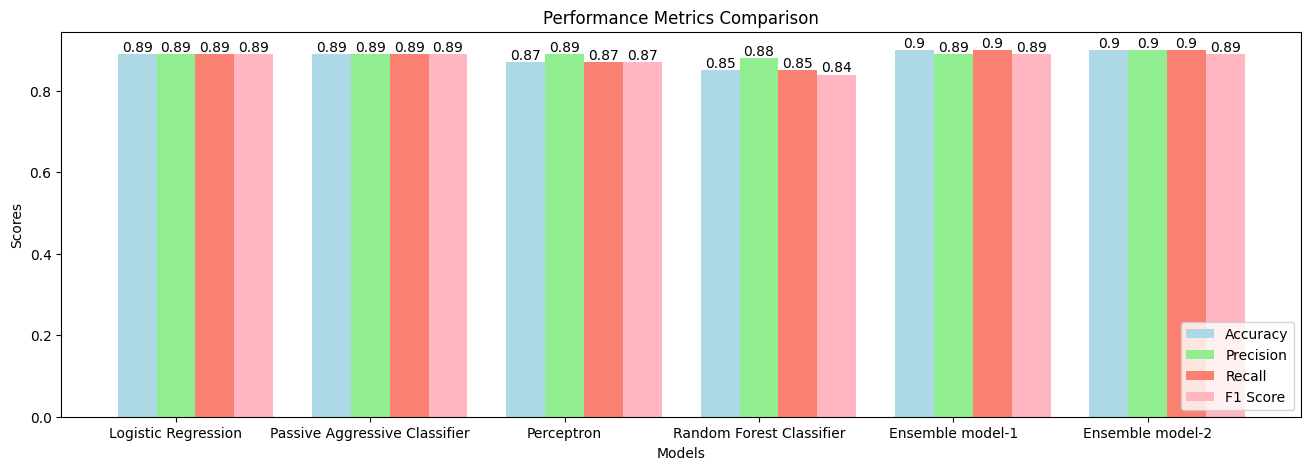

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (accuracy, precision, recall, and F1 score) for four models
models = ['Logistic Regression', 'Passive Aggressive Classifier', 'Perceptron','Random Forest Classifier', 'Ensemble model-1', 'Ensemble model-2']
accuracy = [0.89, 0.89, 0.87,0.85,0.90,0.90]
precision = [0.89, 0.89, 0.89,.88,0.89,0.90]
recall = [0.89, 0.89, 0.87,0.85,0.90,.90]
f1_score = [0.89, 0.89, 0.87,0.84,0.89,0.89]

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plotting the bars
plt.figure(figsize=(16,5))
plt.bar(r1, accuracy, color='lightblue', width=bar_width, label='Accuracy')
plt.bar(r2, precision, color='lightgreen', width=bar_width, label='Precision')
plt.bar(r3, recall, color='salmon', width=bar_width, label='Recall')
plt.bar(r4, f1_score, color='lightpink', width=bar_width, label='F1 Score')

# Add labels, title, and legend

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance Metrics Comparison')
plt.xticks([r + bar_width for r in range(len(models))], models)
plt.legend(loc='lower right')

# Add values above the bars
for i in range(len(models)):
    plt.text(r1[i], accuracy[i], str(accuracy[i]), ha='center', va='bottom')
    plt.text(r2[i], precision[i], str(precision[i]), ha='center', va='bottom')
    plt.text(r3[i], recall[i], str(recall[i]), ha='center', va='bottom')
    plt.text(r4[i], f1_score[i], str(f1_score[i]), ha='center', va='bottom')

# Display the plot
plt.show()
